In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
class AutoEDA:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        
    def read_data(self): 
        while True:
            data_types = ['csv', 'excel']
            data_type = input("Choose Data Type: ('CSV', 'Excel') ").lower()
            
            if data_type not in data_types:
                print("Not Supported Data Type, Please Enter Data Type: 'CSV', 'Excel'")
                continue
            
            data_path = input("Ok, Enter The Path To Data File. ")
            
            try:
                if data_type == 'csv':
                    DF = pd.read_csv(data_path)
                elif data_type == 'excel':
                    DF = pd.read_excel(data_path)
            except FileNotFoundError:
                print("File not found. Please check the file path.")
                continue
            
            print("----------------------------------------------------")
            return DF

    def handle_nulls(self, inplace=True): 
        while True:
            methods = ['mean', 'median', 'drop']
            method = input("Enter the Method to handle Nulls: ('Mean', 'Median', 'Drop'): ").lower()

            if method not in methods:
                print("Invalid Method, Please Enter: 'Mean', 'Median', 'Drop'")
                continue

            try:
                df = self.dataframe if inplace else self.dataframe.copy()

                if method == 'mean':
                    df.fillna(df.mean(), inplace=True)
                elif method == 'median':
                    df.fillna(df.median(), inplace=True)
                elif method == 'drop':
                    df.dropna(inplace=True)

                print("Nulls handled successfully.")
                return df
            except Exception as e:
                print(f"An error occurred: {e}")
                df = None
                return df

    def create_boxplot(self):
        df = self.dataframe

        while True:
            column = input("Enter the column to show boxplot visualization: ")

            if column not in df.columns:
                print(f"Column '{column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.boxplot(df[column], vert=True)
                plt.title(f"Box Plot of {column}")
                plt.xlabel(column)
                plt.ylabel("Values")
                plt.show()
                break  
            except Exception as e:
                print(f"An error occurred: {e}")

              
    def create_barchart(self):
        df = self.dataframe

        while True : 
            x_column = input("Enter the first column: ")
            y_column = input("Enter the second column: ")

            if x_column not in df.columns:
                print(f"Column '{x_column}' not found in the DataFrame.")
                continue

            if y_column not in df.columns:
                print(f"Column '{y_column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.bar(df[x_column], df[y_column])
                plt.title(f"Bar Chart of {y_column} vs. {x_column}")
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.show()
                break  
            except KeyError:
                print("One or more columns not found in the DataFrame.")
            except Exception as e:
                print(f"An error occurred: {e}")

                
    def create_scatter(self):
        df = self.dataframe

        while True : 
            x_column = input("Enter the first column: ")
            y_column = input("Enter the second column: ")

            if x_column not in df.columns:
                print(f"Column '{x_column}' not found in the DataFrame.")
                continue

            if y_column not in df.columns:
                print(f"Column '{y_column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.scatter(df[x_column], df[y_column], c='blue', alpha=0.5, s=30)
                plt.title(f"Scatter Plot of {y_column} vs. {x_column}")
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.grid(True)
                plt.show()
                break  

            except KeyError:
                print("One or more columns not found in the DataFrame.")
            except Exception as e:
                print(f"An error occurred: {e}")

    def create_heatmap(self): 
        df = self.dataframe

        plt.figure(figsize=(12, 10))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title("Correlation Heatmap")
        plt.show()

In [3]:
autoedu = AutoEDA(dataframe=None)
loaded_data = autoedu.read_data()
print("Loaded Data:")
loaded_data.head()

Choose Data Type: ('CSV', 'Excel') CSV
Ok, Enter The Path To Data File. International_Report_Departures.csv
----------------------------------------------------
Loaded Data:


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [4]:
print('Description of data is:')
loaded_data.describe()

Description of data is:


,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


In [5]:
print('Missing values in data are:')
loaded_data.isna().sum()

Missing values in data are:


data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [6]:
auto_eda = AutoEDA(loaded_data)
handled_data = auto_eda.handle_nulls()
handled_data.isna().sum()

Enter the Method to handle Nulls: ('Mean', 'Median', 'Drop'): Drop
Nulls handled successfully.


data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

Enter the column to show boxplot visualization: Total 
Column 'Total ' not found in the DataFrame.
Enter the column to show boxplot visualization: Total


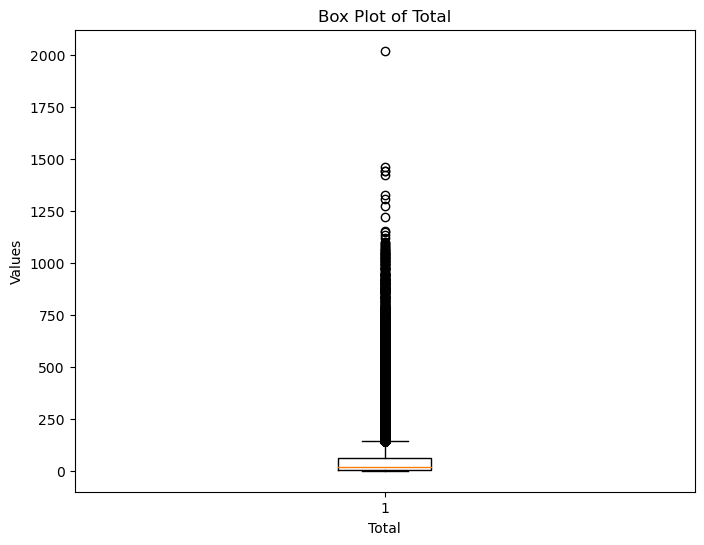

In [7]:
auto_eda = AutoEDA(handled_data)
auto_eda.create_boxplot()

Enter the first column: Total
Enter the second column: Year


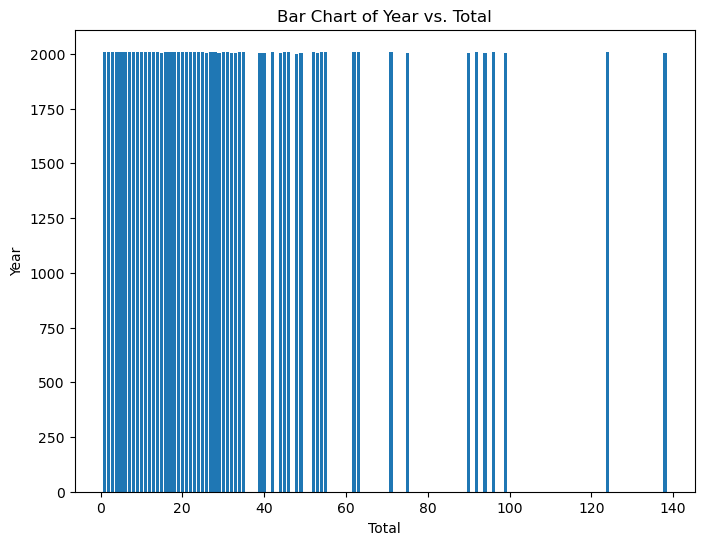

In [8]:
auto_eda = AutoEDA(handled_data[0:1000])
auto_eda.create_barchart()

Enter the first column: Total
Enter the second column: Year


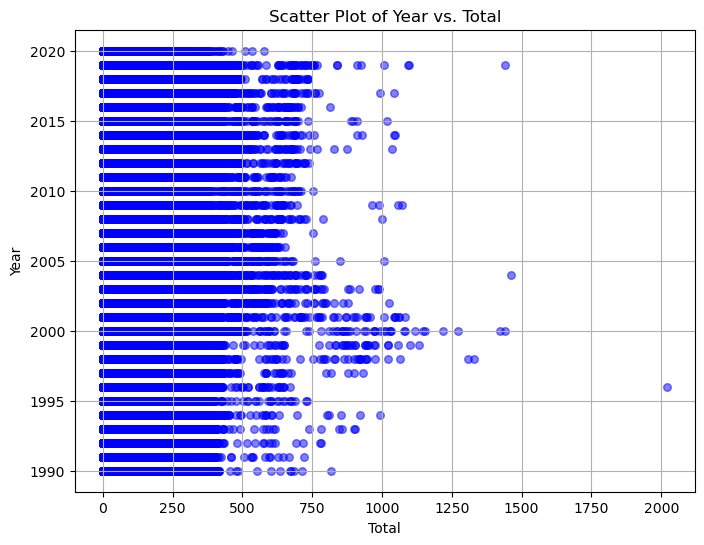

In [9]:
auto_eda = AutoEDA(handled_data)
auto_eda.create_scatter()

C:\Users\Abdalla Ahmed\AppData\Local\Temp\ipykernel_10128\1493760707.py:140: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


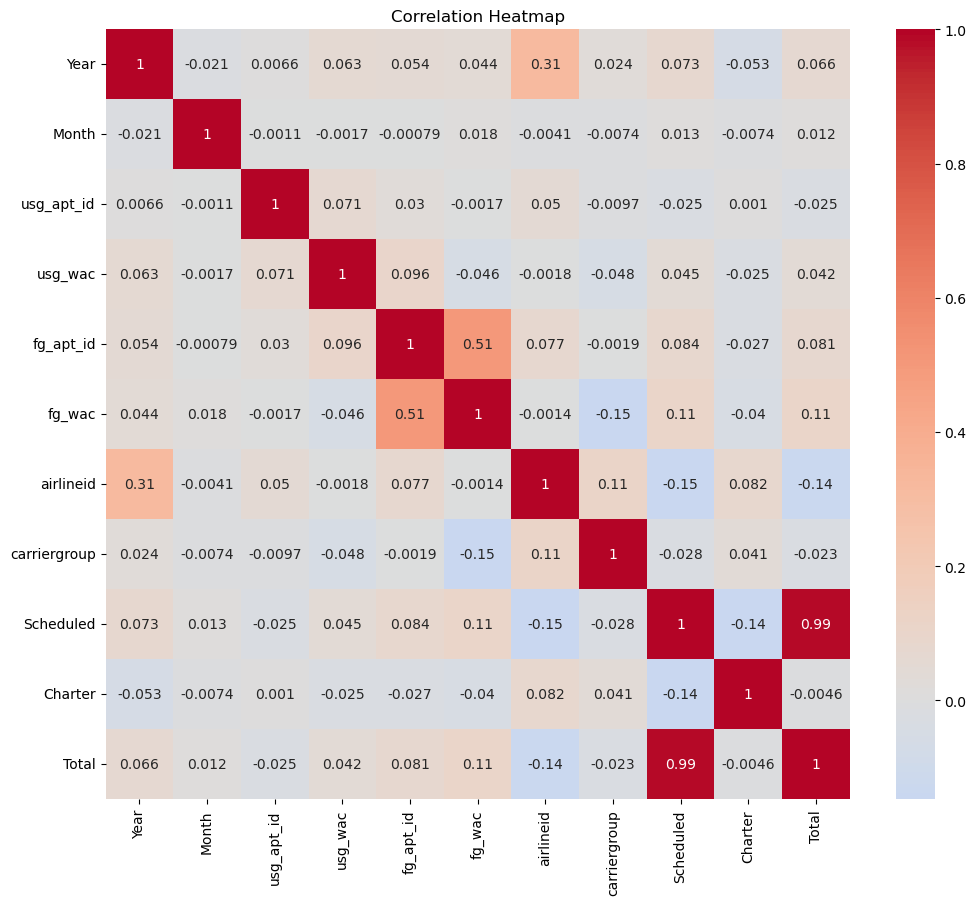

In [10]:
auto_eda = AutoEDA(handled_data)
auto_eda.create_heatmap()